In [1]:
import pandas as pd
from scipy. stats import pearsonr 
import matplotlib.pyplot as plt 


try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведy первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведy основную информацию о датафрейме с помощью метода `info()`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведy количество пропущенных значений для каждого столбца. 

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. 

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В столбце  `days_employed` есть аномальные отрицательные значения. Возьму эти значения по модулю

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведy медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставлю их как есть. Тем более этот столбец не понадобится для исследования.

Выведу перечень уникальных значений столбца `children`

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

 В столбце `children` есть два аномальных значения. Удалю строки, в которых встречаются такие аномальные значения из датафрейма `data`

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

 Ещё раз выведу перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

 Заполню пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

 Проверю себя и ещё раз выведу количество пропущенных значений для каждого столбца с помощью двух методов

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменю вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаю неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведу их к нижнему регистру. 

In [14]:
data['education'] = data['education'].str.lower()

Выведy на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалю их

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создам в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.



In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

 Выведу  на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создам функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

###  Исследование данных и ответы на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Последовательность действий** 
1. Выполнить подсчет общего количества клиентов с разным количеством детей
2. Выполнить подсчет количества клиентов, имевших задолженность по возврату кредитов, по каждому количеству детей
3. Рассчитать процент клиентов с задолженностью в каждой категории количества детей
4. Проанализировать полученные результаты. При необходимости выполнить дополнительные расчеты

In [22]:
#шаг 1
children_counts = data['children'].value_counts()
print(children_counts)

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


In [23]:
#шаг 2
debt_counts = data.groupby('children')['debt'].sum()
print(debt_counts)

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64


In [24]:
#шаг 3
debt_percentage_children = (debt_counts / children_counts) * 100
print(debt_percentage_children)

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
dtype: float64


При одновременном увелечении процента и количества детей, я бы можно говорить, что в датасете есть зависимость между количеством детей и задолженностями. Например, между клиентами, у которых нет детей. И клиентами, у которых есть хотя бы один ребенок - разница в 2%. А вот с семьями, где есть 3 и более ребенка - статистика не сильно отражает действительность, так как таких семей мало и выборка слишком мало. Поэтому в дальнейших выводах я буду опираться на результаты о семьях, где нет детей, есть 1 или 2 ребенка. 
Для получения точных результатов произведу расчет корреляции и значения p-value. Для расчета p-value дополнительно имортируем библиотеку SciPy. Импорт библиотеки в начале блокнота, как этого требует PEP8. 


In [25]:
#вычисление корреляции. Для точности результатов данные берутся из датасета, а не полученных series. 
print(data['children'].corr(data['debt']))

0.024643415439591206


In [26]:
#вычисление статистической значимости с помощью SciPy. 
#Метод возвращает кортеж из 2х значений. 1 - корреляиция, 2 - статистическая значимость
#Делаем проверку на уровень значимости. Если наш результат меньше - данные имеют статистически значимые различия 
corr, p_value = pearsonr(data['children'], data['debt'])
p_value < 0.05

True

Также для наглядности построю график. Для построения графика импортирую библиотеку matplotlib. Согласно PEP8 импорт в начале блокнота

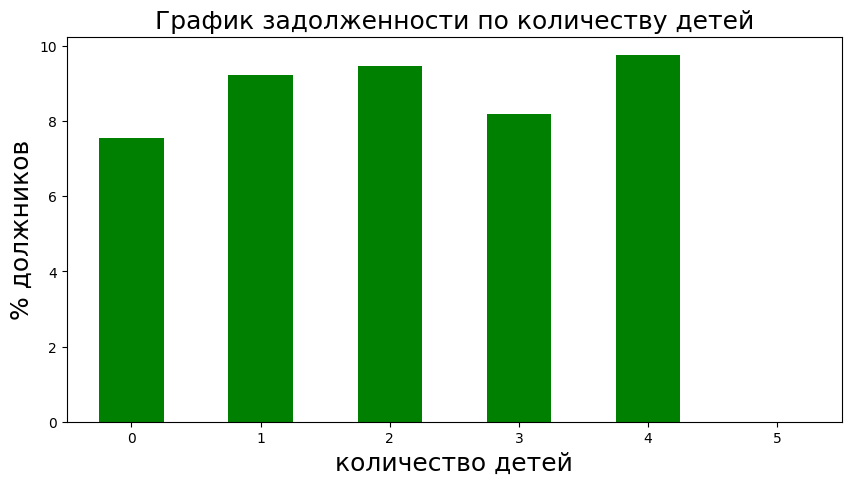

In [27]:
fig = plt.figure(figsize = (10, 5)) #задаем размер поля, в котором будет отображен график
debt_percentage_children.plot.bar(color = 'green') #строим график для объекта Series. Для красоты задаем цвет колонкам. 
#По умолчанию колонки синего цвета
plt.xticks(rotation=0) #Изначально данные по оси X находились перевернуто. Это можно избежать с помощью этого метода
plt.xlabel("количество детей", fontsize=18) #описание значений по оси X
plt.ylabel("% должников", fontsize=18) #описание значений по оси Y
plt.title("График задолженности по количеству детей", fontsize=18) #Название графика
plt.show() #изображение графика 

**Вывод:** 
После дополнительных расчетов, я получила значение корреляции 0.024643415439591042. Она больше нуля, что говорит о положительной корреляции. То есть при увелечении количества детей растет и количество клиетов, у которых есть задолженность. Значение p-value оказался меньше уровня значимости (0.05). Что отвергает нулевую гипотезу. И дает возможность говорить, что зависимость между количеством детей и возвратом кредита в срок есть. При большем количестве детей повышается вероятность задолженностей. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Последовательность действий**
1. Выполнить подсчет общего количества клиентов с разным семейным положением
2. Выполнить подсчет количества клиентов, имевших задолженность по возврату кредитов, по каждому количеству семейного положения
3. Рассчитать процент клиентов с задолженностью в каждой категории семейного положения
4. Проанализировать полученные результаты. При необходимости выполнить дополнительные расчеты и/или построить график


In [28]:
#шаг 1
family_counts = data['family_status'].value_counts()
print(family_counts)

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64


In [29]:
#шаг 2
debt_counts_family = data.groupby('family_status')['debt'].sum()
print(debt_counts_family)

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64


In [30]:
#шаг 3
debt_percentage_family = (debt_counts_family / family_counts) * 100
print(debt_percentage_family)

Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.313014
женат / замужем          7.560558
dtype: float64


Для наглядности представлю данные в виде графика

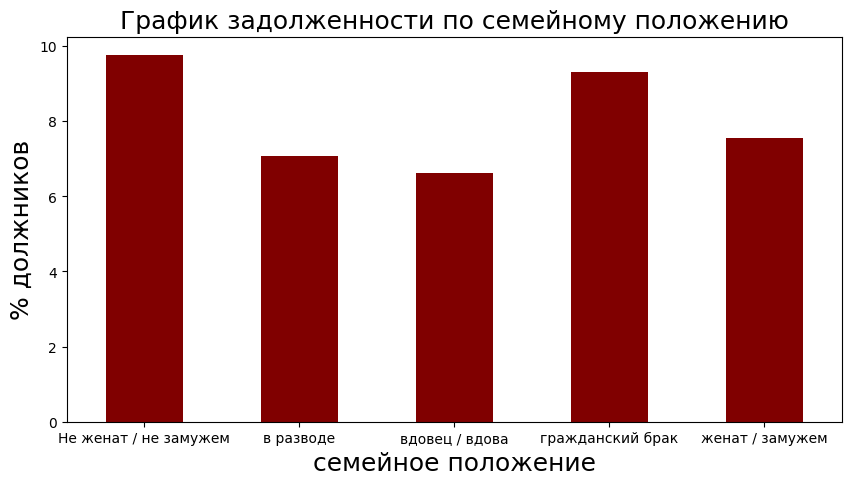

In [31]:
#строю график по анологии с предыдщим заданием
fig = plt.figure(figsize = (10, 5))
debt_percentage_family.plot.bar(color ='maroon')
plt.xticks(rotation=0)
plt.xlabel("семейное положение", fontsize=18)
plt.ylabel("% должников", fontsize=18)
plt.title("График задолженности по семейному положению", fontsize=18)
plt.show()


**Вывод:** 
После расчетов и наглядного представления данных в виде графика можно видеть следующую картину: Больше всего задолженностей у людей, которые не находятся в браке. 9% от общего числа людей этой категории. Чуть меньше у людей в гражданском браке, 8%. Меньше всего задолжнностей у категории людей, которые потеряли своего супруга или супругу. Всего 6% имеют задолженности из этой категории. А вот люди в браке или разводе имеют примерно одинаковый процент задолжностей, 7%. Поэтому можно говорить о корреляции между категорией семейного положения и задолженностях. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

 **Последовательность действий** 
1. Выполнить подсчет общего количества клиентов с разным семейным положением
2. Выполнить подсчет количества клиентов с разным уровнем дохода
3. Рассчитать процент клиентов с задолженностью в каждой группе дохода
4. Проанализировать полученные результаты. При необходимости выполнить дополнительные расчеты и/или построить график

В прошлом блоке уже добавлена категоризация, но для лучшего отображения данных, сделаем еще одну категоризацию, чтобы количество людей в разных категориях было более менее равномерным
- 0– 100000 — 'level 5';
- 100000–130000 — 'level 4';
- 130000–160000 — 'level 3';
- 160000-190000 — 'level 2';
- 190000 и выше - 'level 1'

In [32]:
def categorize_income_2(income):
    try:
        if 0 <= income <= 100_000:
            return 'level 5'
        elif 100_000 <= income <= 130_000:
            return 'level 4'
        elif 130_001 <= income <= 160_000:
            return 'level 3'
        elif 160_001 <= income <= 190_001:
            return 'level 2'
        elif 190_001 <= income:
            return 'level 1'
    except:
        pass

In [33]:
data['total_income_category_2'] = data['total_income'].apply(categorize_income_2)

In [34]:
income_category_counts_2 = data['total_income_category_2'].value_counts()
print(income_category_counts_2)

level 1    5720
level 5    4444
level 3    4373
level 4    3841
level 2    2953
Name: total_income_category_2, dtype: int64


In [35]:
#шаг 2
debt_counts_income = data.groupby('total_income_category_2')['debt'].sum()
print(debt_counts_income)


total_income_category_2
level 1    416
level 2    248
level 3    388
level 4    326
level 5    354
Name: debt, dtype: int64


In [36]:
#шаг 3
debt_percentage_income = (debt_counts_income / income_category_counts_2) * 100
print(debt_percentage_income)


level 1    7.272727
level 2    8.398239
level 3    8.872627
level 4    8.487373
level 5    7.965797
dtype: float64


Для наглядности построю график

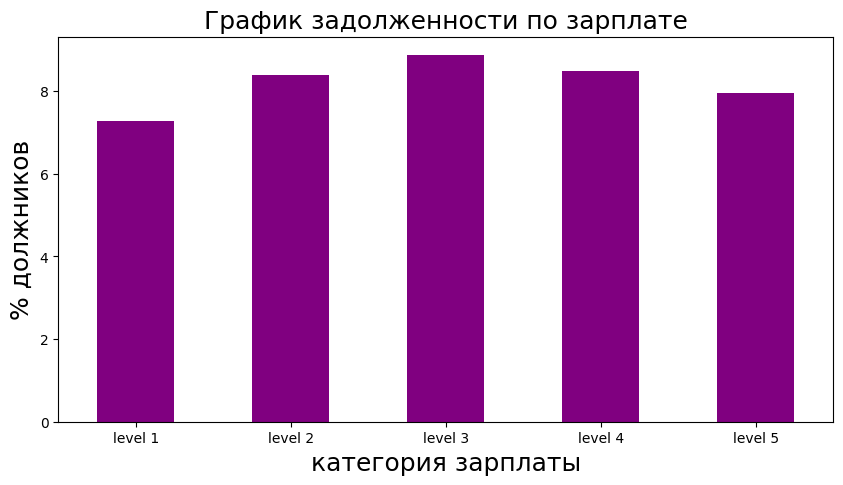

In [37]:
fig = plt.figure(figsize = (10, 5))
debt_percentage_income.plot.bar(color ='purple')
plt.xticks(rotation=0)
plt.xlabel("категория зарплаты", fontsize=18)
plt.ylabel("% должников", fontsize=18)
plt.title("График задолженности по зарплате", fontsize=18)
plt.show()


По графику нельзя точно сказать, есть ли зависимость. Поэтому необходимо произвести дополнительные расчеты

In [38]:
print(data['total_income'].corr(data['debt'])) #расчет кореляции 

-0.01267109881818997


In [39]:
corr, p_value = pearsonr(data['total_income'], data['debt'])
p_value < 0.05

False

**Вывод:** По проведенным расчетам и графикам, можно говорить об отрицатальной корреляции. При увелечении заработной платы падает число должников. Так, у кредиторов из группы 'level 1', у самой высокой по заработной плате, всего 7.2% должников, а у группы из 'level 2' уже 8.4% должников. У лиц, с самой маленькой заработной платой также 8% должников. А у группы со средним доходом самый высокий процент должников - почти 9%. Хоть и p-value не имеет статистической значимости, корреляция между уровнем заработной платой и процентом должников видна. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Последовательность действий** 
1. Выполнить подсчет общего количества клиентов с разным семейным положением
2. Выполнить подсчет количества клиентов с разным уровнем дохода
3. Рассчитать процент клиентов с задолженностью в каждой группе дохода
4. Проанализировать полученные результаты. При необходимости выполнить дополнительные расчеты и/или построить график

In [40]:
#шаг 1
purpose_counts = data['purpose_category'].value_counts()
print(purpose_counts)

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64


In [41]:
#шаг 2
debt_counts_purpose = data.groupby('purpose_category')['debt'].sum()
print(debt_counts_purpose)

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64


In [42]:
#шаг 3
debt_percentage_purpose = (debt_counts_purpose / purpose_counts) * 100
print(debt_percentage_purpose)

операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
dtype: float64


Для нагляднотсти построю график 

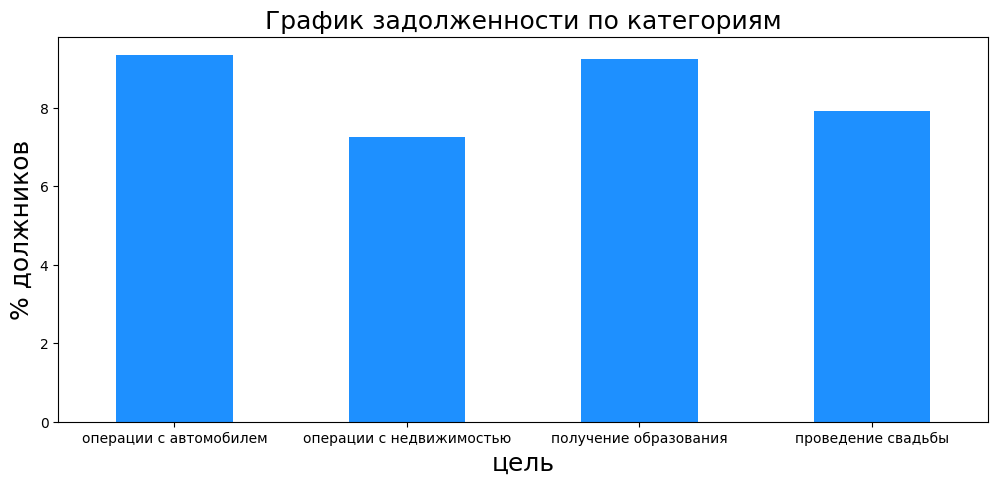

In [43]:
fig = plt.figure(figsize = (12, 5))
debt_percentage_purpose.plot.bar(color ='DodgerBlue')
plt.xticks(rotation=0)
plt.xlabel("цель", fontsize=18)
plt.ylabel("% должников", fontsize=18)
plt.title("График задолженности по категориям", fontsize=18)
plt.show()


Так как категории взятия кредита - категориальные переменные. Расчитать кареляцию и p-value предыдущим способом нельзя.

**Вывод:** По полученным данным можно сказать, что самый большой % должников у тех, кто берет кредит на операции с автомобилем: 9.3% от числа взявших кредит на операции с автомобилем. После него идет получение образования: 9.2%. При взятии кредит на проведение свадьбы задолженность наблюдается у почти 8%. А меньше всего задолженностей у тех, кто взял кредит на недвижимость: 7.2%. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1. Возможно клиент банка сам намеременно не указал данные о ежемесячных дохлдах и трудовом стаже 
2. Произошла техническая ошибка при сборе или передаче данных. Система могла пропустить анкеты с незаполненной информацией
3. Трудовой стаж в днях было невозможно посчитать. Если клиент работает неофициально или на себя
4. Системная ошибка. В базе данных, где хранится информация, могла произойти ошибка и удалились некоторые данные 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Медиана более устойчива к аномальным значениям чем среднее арифметическое. Например, у нас есть 10 человек с разными зарплатами. И у одного из них зарплата на порядок выше или меньше чем у других 9 человек. И из-за этого выброса среднее арифметическре будет сдвинуто в сторону 1 этого человека и результат будет не совсем достоверный. В то время как медиана возьмет значение ровно по середине. 

### Шаг 4: общий вывод.

Заказчик поставил цель: выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. В качестве данных был представлен датасет со следующими столбцами: 

**Описание данных:**
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

**Перед статистическим анализом провела предобработку данных.**
1. В столбце `days_employed` и `total_income` обнарулижила 2174 пропущенных значения. Чтобы это исправить, я нашла медианные значения трудового стажа в днях по типу занятости и медианное значение ежемесячного дохода по типу занятости. 


2. Помимо этого в столбце `days_employed` есть артефакты - отрицательное значение зарплаты. Чтобы это исправить, значение зарплаты взяла по модулю. 


3. В столбце `children` также были аномальные значения. У клиентов были дети с возрастом -1 и 20 лет. Информацию об этих клиентах я удалила. 


4. В столбце `total_income` заменила тип данныз с float64 на int64, так как зарплата не может быть дробной. 


5. Нашла 71 строку-дубликат. Их удалила. 


6. В столбце `education` были неявные дубликаты. Некоторые значения были написаны верхним или нижним регистром. Привела данные в столбце к нижнему регистру. 


7. Провела дополнительную категоризацию данных. Добавила новые столбецы `total_income_category`, `total_income_category_2` и `purpose_category`. 

В столбце `total_income_category` следующие категории по уровню зарплаты: 

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

В столбце `total_income_category_2` следующие категории по уровню зарплаты:
- 0– 100000 — 'level 5';
- 100000–130000 — 'level 4';
- 130000–160000 — 'level 3';
- 160000-190000 — 'level 2';
- 190000 и выше - 'level 1'

Первый вариант больше описывает зарплату с позиции общепринятых классов дохода, а второй вариант подходит для статистического анализа, так как количество людей в группах более равномерно. 

В столбце `purpose_category` следующие категории по взятии кредита: 

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**После всех этих изменений начала обработку данных.**

1. Чтобы проверить зависимость между количеством детей и долгами по кредиту я нашла процент должников из групп с разным количеством детей. Расчитала кореляцию и p-value. Построила график для наглядности. Информации о клиентах у которых более 2х детей мало. При этом, по этим данным можно говорить о том, что при увелечении числа детей растет и количество клиентов с долгами по кредитам. Например, между клиентами, у которых нет детей. И клиентами, у которых есть хотя бы один ребенок - разница в 2%. 
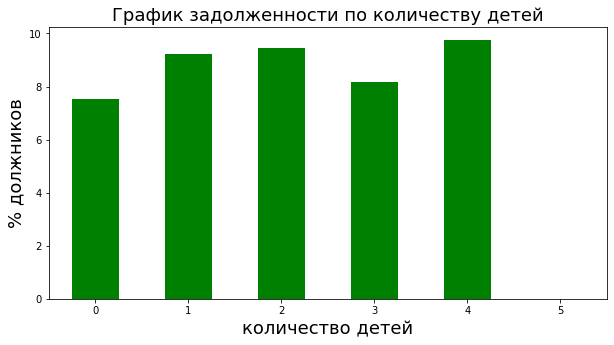

2. Чтобы проверить зависимость между семейным положением и долгами по кредиту я нашла процент должников из групп с разным семейным положением. Построила график для наглядности. По расчетам и наглядному представлению данных я увидела следующую картину: больше всего задолженностей у людей, которые не находятся в браке. 9% от общего числа людей этой категории. Чуть меньше у людей в гражданском браке, 8%. Меньше всего задолжнностей у категории людей, которые потеряли своего супруга или супругу. Всего 6% имеют задолженности из этой категории. А вот люди в браке или разводе имеют примерно одинаковый процент задолжностей, 7%. Поэтому можно говорить о корреляции между категорией семейного положения и задолженностях.

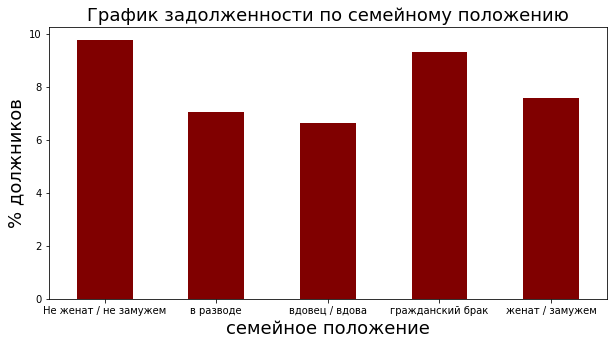

3. Чтобы проверить зависимость между уровнем зарплаты и долгами по кредиту я нашла процент должников из групп с разным уровнем дохода. Расчитала корреляцию и p-value. Построила график для наглядности. По проведенным расчетам и графикам, можно говорить об отрицатальной корреляции. При увелечении заработной платы падает число должников. Так, у кредиторов из группы 'level 1', у самой высокой по заработной плате, всего 7.2% должников, а у группы из 'level 2' уже 8.4% должников. У лиц, с самой маленькой заработной платой также 8% должников. А у группы со средним доходом самый высокий процент должников - почти 9%. Хоть и p-value не имеет статистической значимости, корреляция между уровнем заработной платой и процентом должников видна.

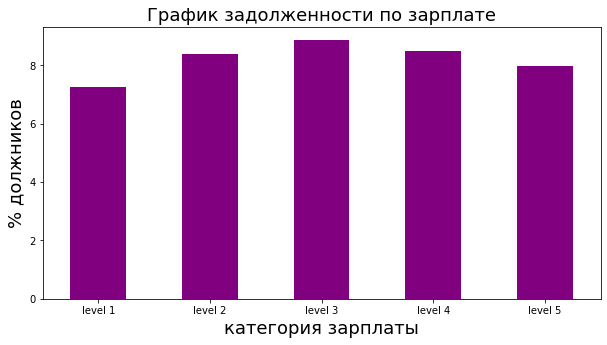

4. Чтобы проверить зависимость между целью взятия кредита и долгами по кредиту я нашла процент должников из групп с разными целями на кредит. Построила график для наглядности. По полученным данным можно сказать, что самый большой % должников у тех, кто берет кредит на операции с автомобилем: 9.3% от числа взявших кредит на операции с автомобилем. После него идет получение образования: 9.2%. При взятии кредит на проведение свадьбы задолженность наблюдается у почти 8%. А меньше всего задолженностей у тех, кто взял кредит на недвижимость: 7.2%.

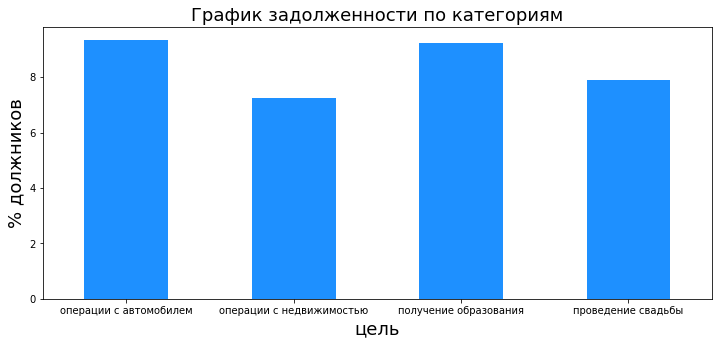

Из этих данных я могу говорить, о том, что есть корреляции между уровнем зарплаты, количеством детей, семейным положением, целями на кредит и количеством должников. Процент должников не превышал 10% по каждой из категории, но даже 10% могут нести большие потери для банка. 